# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_Bootes_cat.fits')

In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J142538.271+323927.172,216.40946075616196,32.657547727634004,5.014806,12.000686,1.2728311,2.9812622,7.563955,0.83495986,0.00085490226,0.00014988695,0.0011898776,0.0015653921,0.9988604,0.99961215,2000.0,2000.0,1.0,1.0
HELP_J142534.629+324009.987,216.39428545616198,32.669440927634,11.246169,21.142097,3.86051,14.766107,28.911581,4.6807,0.00085490226,0.00014988695,0.0011898776,0.0015653921,0.9990621,1.000874,2000.0,1070.0,1.0,1.0
HELP_J142535.345+324017.605,216.39727145616197,32.671556827634,11.735669,21.965956,4.2454877,10.610853,23.08298,2.5343432,0.00085490226,0.00014988695,0.0011898776,0.0015653921,1.0023645,1.0011041,2000.0,2000.0,1.0,1.0
HELP_J142535.979+324020.861,216.39991085616197,32.672461327634004,6.7026505,15.244572,1.9199381,31.25529,50.07641,14.746041,0.00085490226,0.00014988695,0.0011898776,0.0015653921,1.002828,1.0027348,2000.0,1255.0,1.0,1.0
HELP_J142536.203+324030.602,216.40084435616197,32.675167327634,14.810492,24.230303,6.0616727,14.139123,27.653055,4.514166,0.00085490226,0.00014988695,0.0011898776,0.0015653921,0.9988341,0.99992484,2000.0,2000.0,1.0,1.0
HELP_J142536.268+324010.765,216.40111465616198,32.669656927634,6.253192,13.65075,1.8781955,28.09697,43.93519,13.39925,0.00085490226,0.00014988695,0.0011898776,0.0015653921,0.999578,1.0006177,2000.0,2000.0,1.0,1.0
HELP_J142536.664+324017.522,216.40276815616198,32.671533927634,8.215531,16.074,2.5267034,19.754847,36.35485,7.327416,0.00085490226,0.00014988695,0.0011898776,0.0015653921,1.0003843,0.9998351,2000.0,2000.0,1.0,1.0
HELP_J142536.776+323934.023,216.40323235616196,32.659450927634005,6.9625077,16.285847,1.9865959,7.4928994,17.511833,2.2329917,0.00085490226,0.00014988695,0.0011898776,0.0015653921,0.99987173,0.9990841,2000.0,2000.0,1.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

2.778097


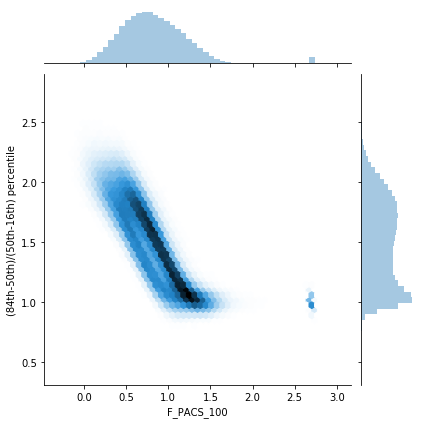

In [9]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))

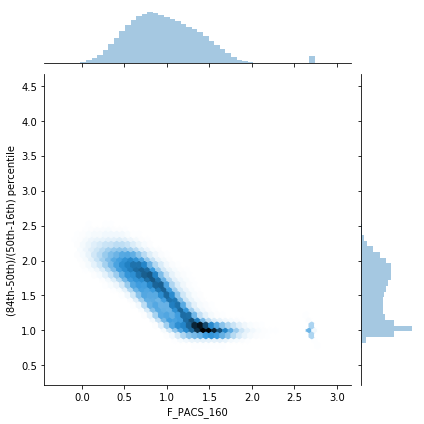

In [12]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

## Add flag to catalogue

In [13]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))


In [14]:
ind_SWIRE_100=(cat['Pval_res_100']>0.5) | (cat['F_PACS_100'] < 10.0) | ((cat['FErr_PACS_100_u']- cat['F_PACS_100'])>150)
ind_SWIRE_160=(cat['Pval_res_160']>0.5) | (cat['F_PACS_160'] < 12.5) | ((cat['FErr_PACS_160_u']- cat['F_PACS_160'])>150)


In [15]:
print(ind_SWIRE_100.sum(),ind_SWIRE_160.sum(),len(cat))

471498 432744 471516


In [16]:
cat['flag_PACS_100'][ind_SWIRE_100]=True
cat['flag_PACS_160'][ind_SWIRE_160]=True

In [17]:
cat.write('./data/dmu26_XID+PACS_Bootes_cat_20190425.fits', format='fits',overwrite=True)


### Check Map

In [18]:
from astropy.io import fits
import pylab as plt

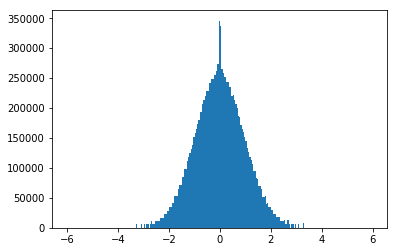

In [21]:
Pval=fits.open('./data/dmu26_XID+PACS_PACS_160_Bootes_Bayes_Pval.fits')
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

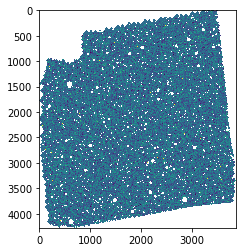

In [22]:
plt.imshow(Pval[1].data)

# Output analysis

In [3]:
import pylab as plt
%matplotlib inline


import numpy as np
import xidplus
from xidplus import moc_routines
output_folder='./data/'

/home/mc741/anaconda3/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


## Original Map

In [4]:
priors,posterior=xidplus.load('./data/Tile_9366836_11.pkl')

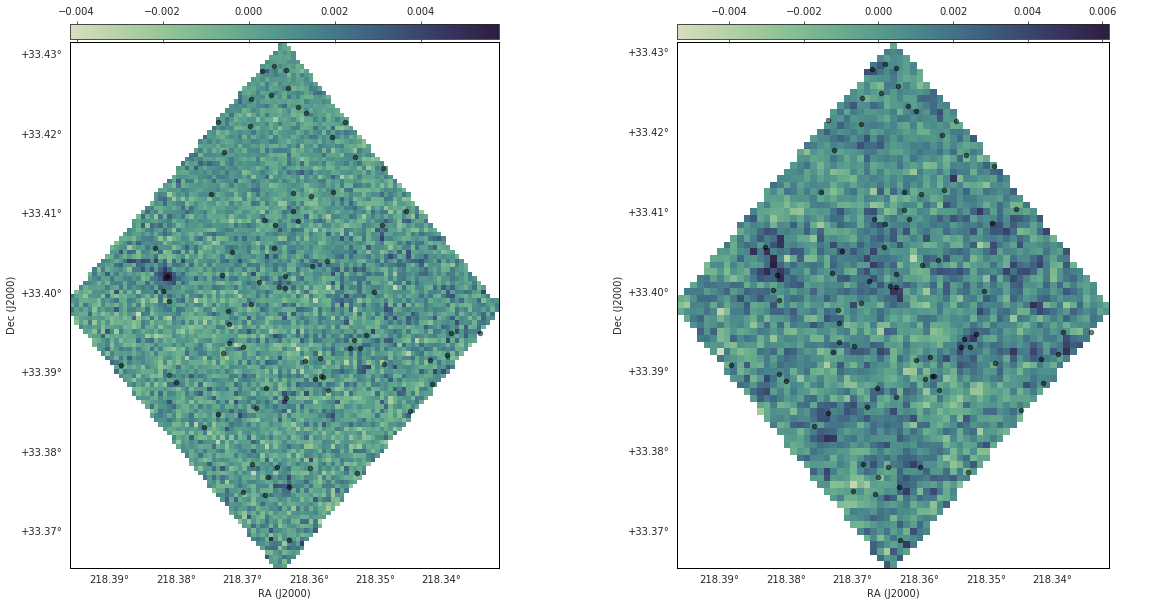

In [5]:
figs,fig=xidplus.plot_map(priors)


## Posterior replicated data


In [6]:
xidplus.replicated_map_movie(priors,posterior,50)

## Joint Posterior Analysis of sources

In [7]:
import aplpy
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
sns.set_style("white")
import xidplus.posterior_maps as postmaps

In [8]:
# Select source you want to plot joint distribution
ra = np.array(priors[0].sra)
dec = np.array(priors[0].sdec)

X = list(zip(ra , dec))
X = np.array(X)

In [9]:
type(X)

numpy.ndarray

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [11]:
for i, j in zip(indices,distances):
    print(i, j)


[ 0 17] [0.         0.00663614]
[ 1 42] [0.         0.00189337]
[2 1] [0.         0.00223303]
[3 1] [0.         0.00286757]
[4 2] [0.         0.00328392]
[5 6] [0.         0.00266198]
[6 5] [0.         0.00266198]
[7 8] [0.         0.00131449]
[8 7] [0.         0.00131449]
[9 8] [0.         0.00740929]
[10 12] [0.         0.00261976]
[11 12] [0.         0.00300691]
[12 10] [0.         0.00261976]
[13 11] [0.         0.00471565]
[14 22] [0.         0.00417354]
[15 16] [0.         0.00708773]
[16 17] [0.         0.00399286]
[17 42] [0.         0.00307004]
[18 19] [0.         0.00426548]
[19 10] [0.         0.00283007]
[20 21] [0.         0.00550033]
[21 22] [0.         0.00188154]
[22 23] [0.         0.00133511]
[23 24] [0.         0.00109209]
[24 23] [0.         0.00109209]
[25 33] [0.         0.00341133]
[26 28] [0.         0.00189154]
[27 32] [0.         0.00242213]
[28 29] [0.         0.00030307]
[29 28] [0.         0.00030307]
[30 34] [0.         0.00224718]
[31 29] [0.         0.00

In [12]:
s1 = 59
s2 = 57

INFO: Auto-setting vmin to -3.468e-03 [aplpy.core]
INFO: Auto-setting vmax to  4.705e-03 [aplpy.core]


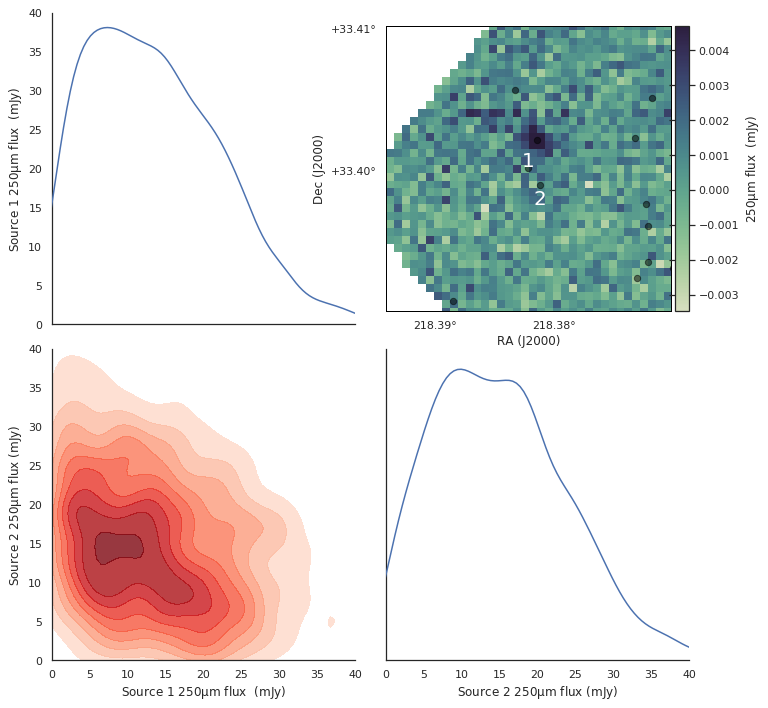

In [13]:
labels=[r'Source 1 $250\mathrm{\mu m}$ flux  (mJy)',r'Source 2 $250\mathrm{\mu m}$ flux (mJy)']
df = pd.DataFrame(posterior.samples['src_f'][:,0,[s1,s2]],columns=labels)
g = sns.PairGrid(df,size=5)
g.map_diag(sns.kdeplot,c='Red')
g.map_lower(sns.kdeplot, cmap="Reds",alpha=0.8,n_levels=10,normed=True, shade=True,shade_lowest=False)
g.set(ylim=(0,40))
g.set(xlim=(0,40))

g.axes[0,1].spines['bottom'].set_color('white')
g.axes[0,1].spines['left'].set_color('white')
cmap=sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

real_250 = aplpy.FITSFigure(postmaps.make_fits_image(priors[0],priors[0].sim)[1],figure=g.fig,subplot=(2,2,2))
real_250.show_colorscale(cmap=cmap)

real_250.show_markers(priors[0].sra, priors[0].sdec, edgecolor='black', facecolor='black',
                marker='o', s=40, alpha=0.5)
real_250.recenter(priors[0].sra[s1], priors[0].sdec[s1], radius=0.01)

real_250.add_label(priors[0].sra[s1], priors[0].sdec[s1]+0.0005, 1, relative=False,size=20,color='white')
real_250.add_label(priors[0].sra[s2], priors[0].sdec[s2]-0.0010, 2, relative=False,size=20,color='white')
real_250.tick_labels.set_xformat('dd.dd')
real_250.tick_labels.set_yformat('dd.dd')


real_250.add_colorbar(axis_label_text=r'$250\mathrm{\mu m}$ flux  (mJy)')


### Posterior Predictive checking and Bayesian P-value maps


Text(0, 0.5, 'p(pixel flux)')

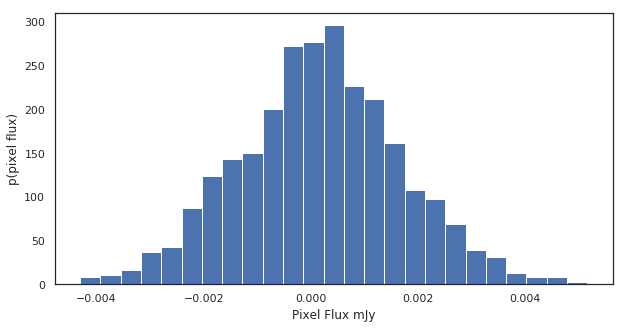

In [93]:
from xidplus import posterior_maps as postmaps

rep_maps=postmaps.replicated_maps(priors,posterior)

import matplotlib as mpl
sns.set_style("white")

fig=plt.figure(figsize=(10,5))


# This is  the colormap I'd like to use.
cm = sns.diverging_palette(220, 20, as_cmap=True)

# Get the histogramp
Y,X = np.histogram(rep_maps[1][20,:], 25, normed=1)
plt.bar(X[:-1],Y,width=X[1]-X[0])
#plt.hist(rep_maps[1][20,:], 25, normed=True)
plt.xlabel('Pixel Flux mJy')
plt.ylabel('p(pixel flux)')


Text(0, 0.5, 'p(pixel flux)')

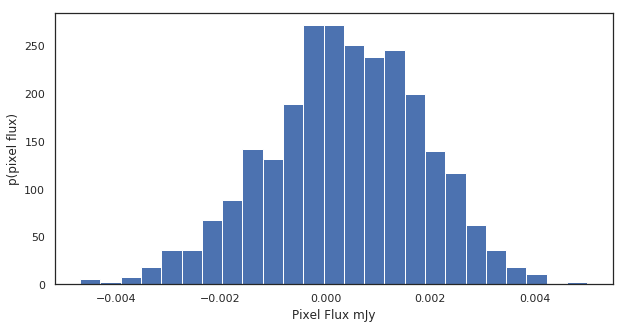

In [100]:
from xidplus import posterior_maps as postmaps

rep_maps=postmaps.replicated_maps(priors,posterior)

import matplotlib as mpl
sns.set_style("white")

fig=plt.figure(figsize=(10,5))


# This is  the colormap I'd like to use.
cm = sns.diverging_palette(220, 20, as_cmap=True)

# Get the histogramp
#Y,X = np.histogram(rep_maps[1][20,:], 25, normed=1)
#plt.bar(X[:-1],Y,width=X[1]-X[0])
plt.hist(rep_maps[1][20,:], 25, normed=True)
plt.xlabel('Pixel Flux mJy')
plt.ylabel('p(pixel flux)')


In [102]:
X

array([-4.11889512e-03, -3.74018340e-03, -3.36147169e-03, -2.98275997e-03,
       -2.60404825e-03, -2.22533653e-03, -1.84662482e-03, -1.46791310e-03,
       -1.08920138e-03, -7.10489665e-04, -3.31777947e-04,  4.69337705e-05,
        4.25645488e-04,  8.04357205e-04,  1.18306892e-03,  1.56178064e-03,
        1.94049236e-03,  2.31920408e-03,  2.69791579e-03,  3.07662751e-03,
        3.45533923e-03,  3.83405095e-03,  4.21276266e-03,  4.59147438e-03,
        4.97018610e-03,  5.34889782e-03])

In [24]:
from xidplus import posterior_maps

post_rep_map=postmaps.replicated_maps(priors,posterior,nrep=2000)
Bayes_P24=postmaps.Bayes_Pval_res(priors[0],post_rep_map[0])

In [55]:
np.shape(post_rep_map[1])



(2655, 2000)

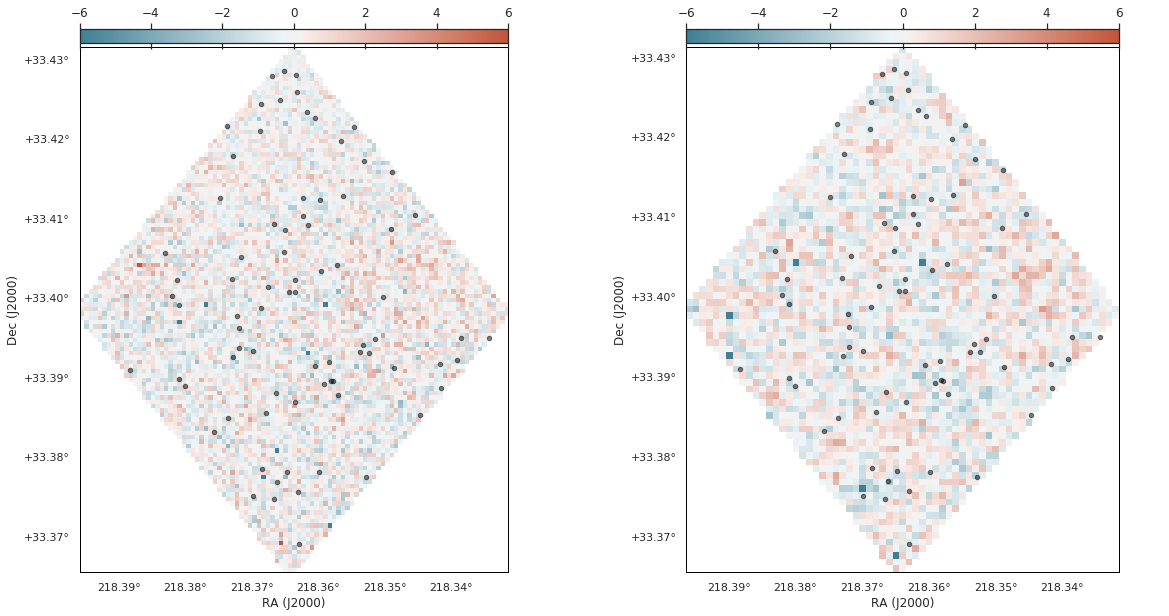

In [158]:
from xidplus import posterior_maps as postmaps

figs, fig=xidplus.plot_Bayes_pval_map(priors, posterior)

